In [24]:
"""
Rhode Schwarz (BatMaus) Demo
Author: Andrei V.
"""

# from slab import *
# from slab.datamanagement import SlabFile
import numpy as np
import os
import datetime
import os.path
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib notebook

import RhodeSchwarz
reload(RhodeSchwarz)

from RhodeSchwarz import RhodeSchwarz
from RhodeSchwarz import ZVB8


In [25]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.14.231', reset = True)

In [26]:
rs.get_id()

I'm Bat Mouse!


'Rohde-Schwarz,ZNB8-4Port,1311601044101437,3.20\n'

In [27]:
import time

In [28]:
rs.reset()

## Resonator readout scans

In [44]:
importedomegaresgarray = [6.16385,6.39107,6.6134,6.82925,6.9522,6.72875,6.50145,6.27853]
importedomegaqgarray =  [4.5155, 4.9105, 4.5355, 4.4305, 4.5555, 4.9505, 4.5755, 6.05]

In [29]:
dataarray = []
resonatorbw = 8e6
# for ii in [0,1,2,3,4,5,6]:
for ii in [0,1,2,3,4,5,6]:
    rs.reset()
    time.sleep(0.2)
    trans_settings = rs.trans_default_settings()
    trans_settings['start_freq'] = importedomegaresgarray[ii]*1e9-resonatorbw/2
    trans_settings['stop_freq'] = importedomegaresgarray[ii]*1e9+resonatorbw/2
    trans_settings['avg_time'] = 2
    trans_settings['ifBW'] = 1000
    trans_settings['RFpower'] = -25
    trans_settings['freq_points'] = 401
    trans_settings
    dataarray.append(rs.trans_meas(trans_settings))

<IPython.core.display.Javascript object>


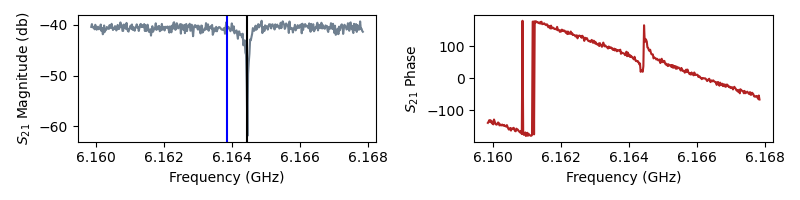

<IPython.core.display.Javascript object>


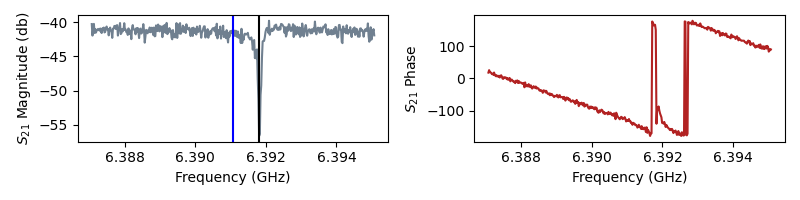

<IPython.core.display.Javascript object>


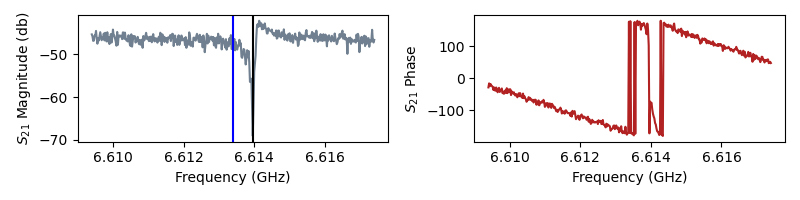

<IPython.core.display.Javascript object>


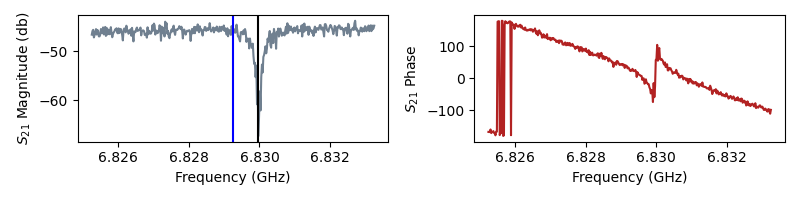

<IPython.core.display.Javascript object>


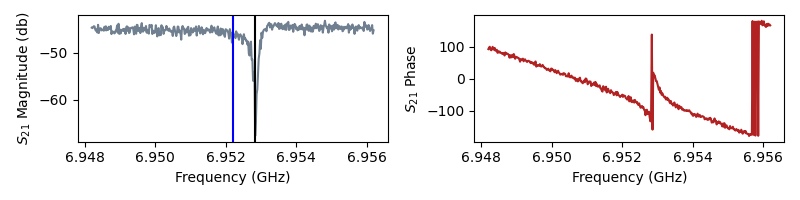

<IPython.core.display.Javascript object>


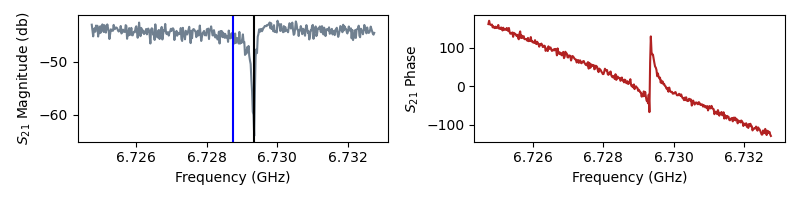

<IPython.core.display.Javascript object>


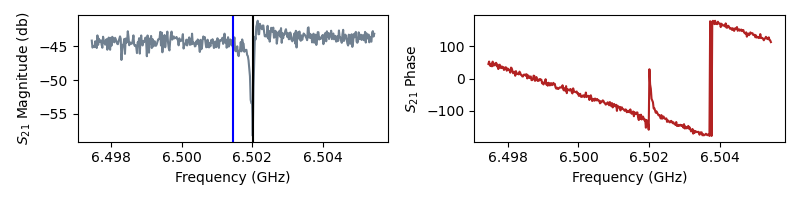

In [32]:
omegaresgarray = []
# for ii in [0,1,2,3,4,5,6]:
for ii in [0,1,2,3,4,5,6]:
    data = dataarray[ii]
    
    mag = np.array(eval(str(data['mag'])))
    phase = np.array(eval(str(data['phase'])))
    freq = np.array(eval(str(data['xaxis'])))/1e9

    fig, ax = plt.subplots(1,2,figsize=(8, 2));

    ax1 = ax[0]
    ax1.plot(freq,mag, color = 'slategrey')
#     yhat = savgol_filter(y, 51, 3)
#     p = fitlor(data['freq']/1e9,savgol_filter(data['mag'],51,7))
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
#     ax1.set_xlim(span)
#     ax1.axvline(p[2] , color = 'k')
    ax1.axvline((freq)[np.argmin(mag)] , color = 'k')
    ax1.axvline(importedomegaresgarray[ii],color = 'b',label = 'importedomegares')

    ax1 = ax[1]
    ax1.plot(freq,phase, color = 'firebrick')
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Phase');
#     ax1.set_xlim(span)
#     ax1.axvline(marker , color = 'k')

    plt.tight_layout()
    
    omegaresgarray.append((freq)[np.argmin(mag)])

## Two tone Spec across lattice

In [46]:
QubSearchBw = 400e6
dataarray = []
for ii in [0,1,2,3,4,5,6]:
# for ii in [0]:
    rs.reset()
    spec_settings = rs.spec_default_settings()
    spec_settings['CAVport'] = 1
    spec_settings['RFport'] = 3
    spec_settings['Mport'] = 2

    spec_settings['start_freq'] = importedomegaqgarray[ii] * 1e9 - QubSearchBw/2
    spec_settings['stop_freq'] = importedomegaqgarray[ii] * 1e9 + QubSearchBw/2
    spec_settings['RFpower'] = 0
    spec_settings['CAVfreq'] = omegaresgarray[ii]*1e9
    spec_settings['CAVpower'] = -25
    spec_settings['avg_time'] = 20
    spec_settings['ifBW'] = 1000
    spec_settings['freq_points'] = 501
    spec_settings['measurement'] = 'S21'
#     print(spec_settings)
    
    dataarray.append(rs.spec_meas(spec_settings))

In [47]:
from scipy.signal import savgol_filter
from slab.dsfit import fitlor
from slab.dsfit import lorfunc

### Measuring Q3 more carefully

<IPython.core.display.Javascript object>


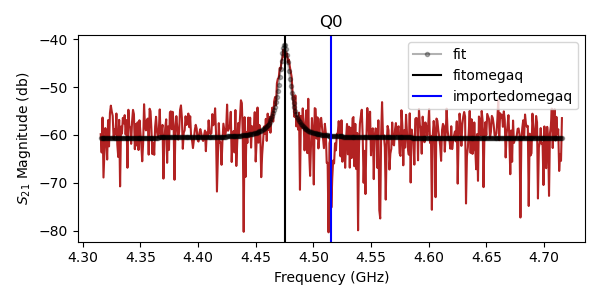

<IPython.core.display.Javascript object>


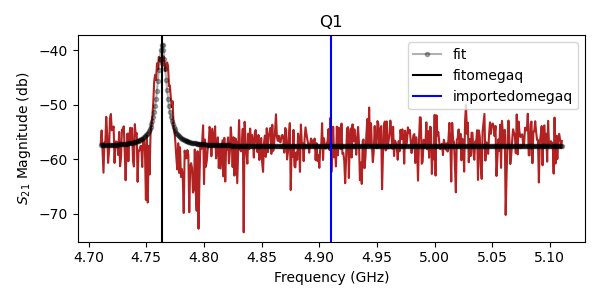

<IPython.core.display.Javascript object>


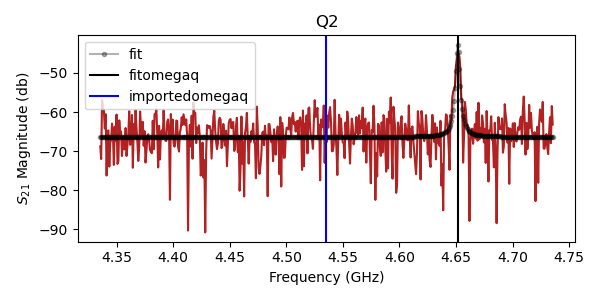

<IPython.core.display.Javascript object>


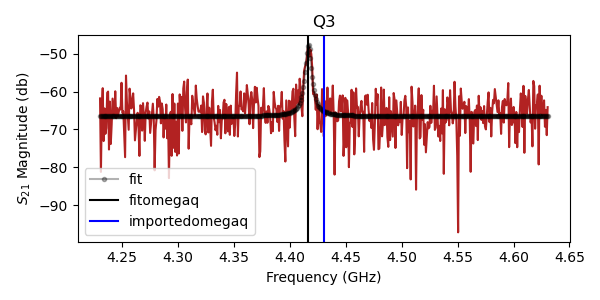

<IPython.core.display.Javascript object>


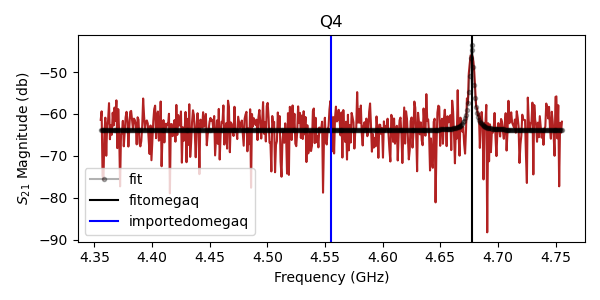

<IPython.core.display.Javascript object>


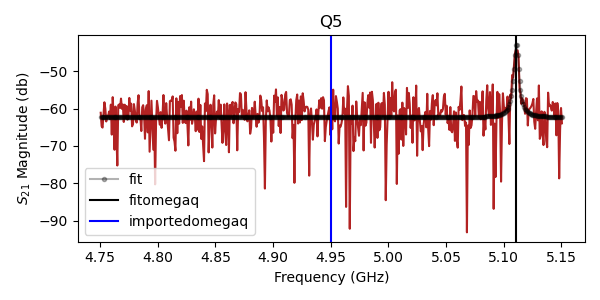

<IPython.core.display.Javascript object>


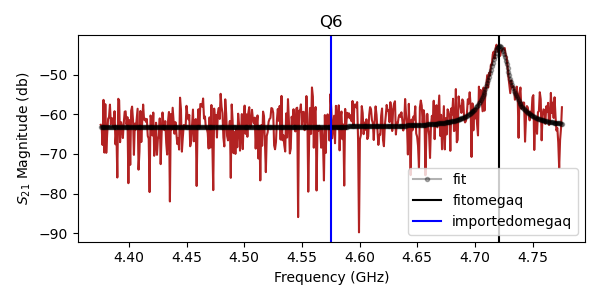

[4.47501811 4.76372473 4.65154458 4.41669217 4.67729502 5.11091204
 4.72128187]


In [50]:
omegaqgarray = []
for ii in [0,1,2,3,4,5,6]:
# for ii in [0]:
    data = dataarray[ii]
    
    mag = np.array(eval(str(data['mag'])))
    phase = np.array(eval(str(data['phase'])))
    freq = np.array(eval(str(data['xaxis'])))/1e9
    
    
    fig, ax = plt.subplots(figsize=(6, 3));
    ax1 = ax
    ax1.plot(freq, mag, color = 'firebrick')
    p = fitlor(freq, mag)
    ax1.plot(freq, lorfunc(p, freq), 'k.-', label='fit',alpha = 0.3)
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
    ax1.axvline(p[2] , color = 'k',label = 'fitomegaq')
    ax1.axvline(importedomegaqgarray[ii],color = 'b',label = 'importedomegaq')
    plt.title("Q%s"%ii)
    plt.tight_layout()
    plt.legend()
    
    omegaqgarray.append(p[2])
print(np.array(omegaqgarray))

In [27]:
omegaqgarray

[4.4816330112458855,
 4.767244903087652,
 4.653447016125345,
 4.406034660572833,
 4.678026427066966,
 5.113726666132307,
 4.7201454796214986]

## Looks like DACBox isn't tuning qubits - likely open on Q3's flux line! 

In [ ]:
a